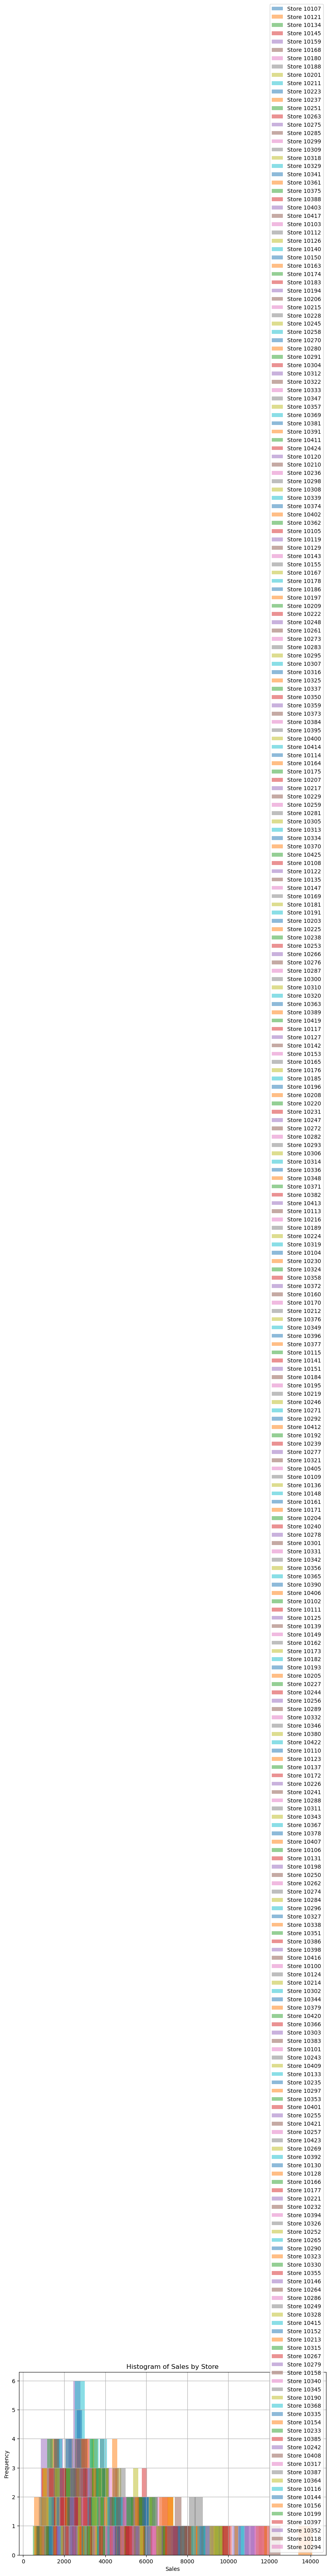

ANOVA Test Result:
F-statistic: 1.1547680081728537
p-value: 0.04142621063245949
The p-value is less than the significance level (alpha), so we reject the null hypothesis.
There is sufficient evidence to suggest that there is a significant difference in sales between at least two stores.


In [8]:
import csv
import numpy as np
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

def process_sales_data(file_path):
    sales_by_store = {}

    with open(file_path, 'r', encoding='latin-1') as file:
        reader = csv.DictReader(file)
        for row in reader:
            store_id = row['ORDERNUMBER']
            sales_amount = float(row['SALES'])
            
            # Update sales by store
            if store_id in sales_by_store:
                sales_by_store[store_id].append(sales_amount)
            else:
                sales_by_store[store_id] = [sales_amount]
    
    return sales_by_store

file_path = 'sales_data.csv'
sales_by_store = process_sales_data(file_path)

# Convert sales data to numpy arrays for ANOVA test
sales_data = [np.array(sales) for sales in sales_by_store.values()]

# Perform ANOVA test
f_statistic, p_value = f_oneway(*sales_data)

# Plotting histogram
plt.figure(figsize=(10, 6))
for store_id, sales in sales_by_store.items():
    plt.hist(sales, bins=20, alpha=0.5, label=f'Store {store_id}')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Sales by Store')
plt.legend()
plt.grid(True)
plt.show()

# Interpret the result
alpha = 0.05  # significance level
print("ANOVA Test Result:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)
if p_value < alpha:
    print("The p-value is less than the significance level (alpha), so we reject the null hypothesis.")
    print("There is sufficient evidence to suggest that there is a significant difference in sales between at least two stores.")
else:
    print("The p-value is greater than or equal to the significance level (alpha), so we fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest that there is a significant difference in sales between stores.")
